# Final Project for Unsupervised Machine Learning

## Unsupervised Machine Learning with New York Stock Exchange

[Data Source](https://www.kaggle.com/dgawlik/nyse)
fundamentals.csv: metrics extracted from annual SEC 10K fillings (2012-2016), should be enough to derive most of popular fundamental indicators.

<br />
<hr />

    Mustafa Tayyip BAYRAM
     February 2, 2022
<hr />
<br />

## Objective
We will use clustering and unsupervised learning techniques to determine the best candidate algorithm that properly predicts whether a firm has a net profit or loss in this project. To do so, we'll convert the Net Income column to a binary representation of whether or not a firm made a profit, with 0 indicating a loss and 1 indicating a profit.

Why do we use net income as a metric?

After all expenditures have been removed from revenues, a company's profit is referred to as net income. This figure appears on a company's income statement and serves as a measure of its profitability.

## Data Set Contents
This dataset is a playground for fundamental and technical analysis. It is said that 30% of traffic on stocks is already generated by machines, can trading be fully automated? If not, there is still a lot to learn from historical data.

## Notebook Contents
>1. Importing Packages
>2. Feature Engineering
>3. Model Training
>> -KMeans Clustering
>> -Complete-link Agglomerative Clustering
>> -Ward-link Agglomerative Clustering



## 1. Importing packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

In [4]:
numpy_array=np.array([0,1,2,3,4,5])
print(numpy_array.reshape(2,3))

[[0 1 2]
 [3 4 5]]


In [3]:
# Suppressing warning messages
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Apply the default default seaborn theme, scaling, and color palette
sns.set()

In [5]:
df = pd.read_csv('fundamentals.csv', sep=',')
df = df.iloc[:, 1:]     # First col is the index. Therefore, we can drop it.
df.head()

,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,1.085000e+09,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,5.981110e+08,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


## 2. Feature Engineering

In [6]:
df.shape

(1781, 78)

In [7]:
df.describe()

,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
count,1.781000e+03,1.781000e+03,1.781000e+03,1781.000000,1.781000e+03,1.781000e+03,1482.000000,1.781000e+03,1.781000e+03,1.781000e+03,...,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1608.000000,1562.000000,1.562000e+03
mean,4.673418e+09,-6.353484e+07,6.908940e+07,43.601348,-1.251925e+09,5.351784e+09,74.457490,8.521399e+09,-6.787749e+07,1.608543e+09,...,6.726349e+09,4.699919e+09,1.188846e+10,4.380420e+10,5.569266e+10,2.029154e+10,-3.951522e+09,2013.305348,3.353707,6.024244e+08
std,1.406047e+10,7.562794e+08,6.848143e+08,233.924028,2.979963e+09,1.133977e+10,102.298374,5.432105e+10,3.903369e+08,9.177636e+09,...,1.344800e+10,9.538832e+09,2.584429e+10,1.817039e+11,2.033612e+11,4.095355e+10,1.407047e+10,19.953135,4.695896,1.142585e+09
min,0.000000e+00,-6.452000e+09,-6.768000e+09,0.000000,-3.798500e+10,-7.215000e+08,0.000000,2.100000e+04,-5.562000e+09,0.000000e+00,...,0.000000e+00,0.000000e+00,-1.324400e+10,2.577000e+06,2.705000e+06,1.514000e+06,-2.297340e+11,1215.000000,-61.200000,-1.513945e+09
25%,5.160000e+08,-1.040000e+08,-2.638000e+06,10.000000,-1.151200e+09,4.791000e+08,17.000000,3.088000e+08,-5.400000e+07,1.628000e+06,...,1.044178e+09,5.640760e+08,2.201492e+09,3.843300e+09,6.552689e+09,3.714000e+09,-3.040895e+09,2013.000000,1.590000,1.493318e+08
50%,1.334000e+09,-1.830000e+07,2.000000e+06,16.000000,-3.580000e+08,1.997080e+09,41.000000,8.625900e+08,0.000000e+00,7.725000e+06,...,2.747200e+09,1.701500e+09,4.983000e+09,9.141000e+09,1.517000e+10,8.023200e+09,-3.068350e+08,2014.000000,2.810000,2.929409e+08
75%,3.246000e+09,7.816000e+06,3.359200e+07,26.000000,-1.291000e+08,5.735000e+09,90.000000,2.310000e+09,0.000000e+00,2.970000e+08,...,6.162000e+09,4.381000e+09,1.080900e+10,2.389700e+10,3.599710e+10,1.748600e+10,0.000000e+00,2015.000000,4.590000,5.492163e+08
max,2.069390e+11,2.266400e+10,1.416200e+10,5789.000000,5.000000e+06,1.082880e+11,1041.000000,7.281110e+11,3.755000e+09,1.581420e+11,...,1.396600e+11,9.028100e+10,2.562050e+11,2.340547e+12,2.572274e+12,4.856510e+11,0.000000e+00,2016.000000,50.090000,1.610769e+10


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 78 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Ticker Symbol                                        1781 non-null   object 
 1   Period Ending                                        1781 non-null   object 
 2   Accounts Payable                                     1781 non-null   float64
 3   Accounts Receivable                                  1781 non-null   float64
 4   Add'l income/expense items                           1781 non-null   float64
 5   After Tax ROE                                        1781 non-null   float64
 6   Capital Expenditures                                 1781 non-null   float64
 7   Capital Surplus                                      1781 non-null   float64
 8   Cash Ratio                                           1482 non-null  

In [9]:
df.isnull().sum().sort_values(ascending=False)

Quick Ratio                     299
Cash Ratio                      299
Current Ratio                   299
Estimated Shares Outstanding    219
Earnings Per Share              219
                               ... 
Intangible Assets                 0
Income Tax                        0
Gross Profit                      0
Gross Margin                      0
Net Cash Flows-Investing          0
Length: 78, dtype: int64

<AxesSubplot:xlabel='Ticker Symbol', ylabel='Net Income'>

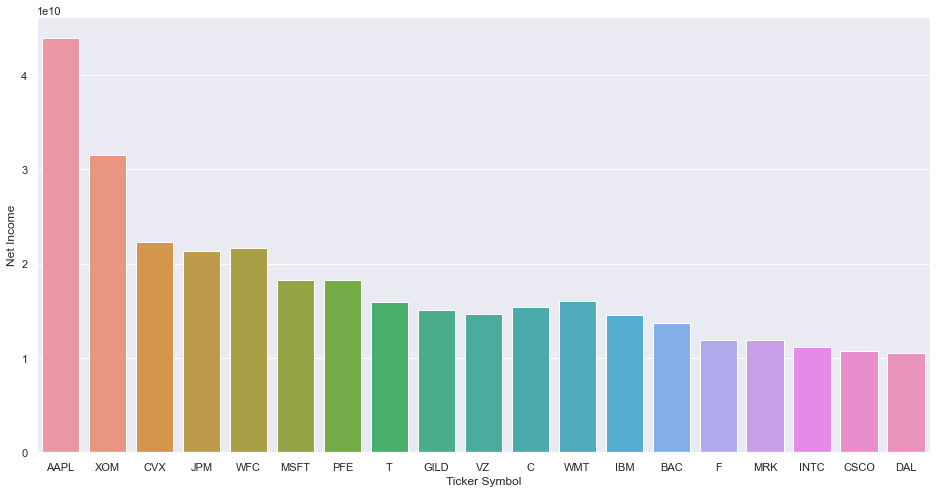

In [10]:
plt.figure(figsize=(16,8))
dt = df.sort_values(by = 'Net Income', ascending=False).head(50)
sns.barplot(x=dt['Ticker Symbol'], y=df['Net Income'], ci=None)

In [11]:
duplicateRows = df[df.duplicated()]
duplicateRows

,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding


- We also don't need **Ticker Symbol** and **Period Ending** cols.
- Columns with missing values should be removed.
- Ensure that all columns are continuous, as this is required for K-means clustering.
- Ascertain that the data is scaled and dispersed normally.
- Transform Net Income into a binary column



In [12]:
df = df.drop(['Ticker Symbol', 'Period Ending'], axis=1)
df.dropna(axis=1, inplace=True)

In [13]:
df.isnull().sum().sort_values(ascending=False)

Accounts Payable              0
Other Assets                  0
Other Liabilities             0
Other Investing Activities    0
Other Financing Activities    0
                             ..
Minority Interest             0
Misc. Stocks                  0
Net Borrowings                0
Net Cash Flow                 0
Treasury Stock                0
Length: 70, dtype: int64

In [14]:
df.dtypes

Accounts Payable              float64
Accounts Receivable           float64
Add'l income/expense items    float64
After Tax ROE                 float64
Capital Expenditures          float64
                               ...   
Total Equity                  float64
Total Liabilities             float64
Total Liabilities & Equity    float64
Total Revenue                 float64
Treasury Stock                float64
Length: 70, dtype: object

In [15]:
df['Net Income'] = df['Net Income'].apply(lambda x: 1 if x > 0 else 0)

In [16]:
df['Net Income'].value_counts()

1    1679
0     102
Name: Net Income, dtype: int64

In [17]:
log_cols = df.skew().sort_values(ascending=False)
log_cols = log_cols.loc[log_cols > 0.75]
log_cols

Pre-Tax ROE                                            18.004280
After Tax ROE                                          15.976369
Other Operating Activities                             15.831375
Minority Interest                                      15.767097
Equity Earnings/Loss Unconsolidated Subsidiary         14.912184
Accounts Receivable                                    14.464002
Common Stocks                                          12.146709
Short-Term Debt / Current Portion of Long-Term Debt    11.884716
Non-Recurring Items                                    11.804363
Long-Term Debt                                         11.361075
Interest Expense                                       11.275234
Other Liabilities                                      11.067952
Short-Term Investments                                 10.868986
Cash and Cash Equivalents                              10.106988
Intangible Assets                                      10.033343
Add'l income/expense item

In [18]:
# The log transformation
for col in log_cols.index:
    df[col] = np.log1p(df[col])

In [19]:
df.dropna(axis=1,inplace=True)

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
feature_col = [x for x in df.columns if x not in ['Net Income']]
for col in feature_col:
    df[col] = sc.fit_transform(df[[col]])

df.head(5)

,Accounts Payable,After Tax ROE,Capital Expenditures,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,Cost of Revenue,Deferred Asset Charges,Deferred Liability Charges,Effect of Exchange Rate,...,Sale and Purchase of Stock,Short-Term Debt / Current Portion of Long-Term Debt,Short-Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock
0,0.350471,0.298032,-0.213511,0.241034,0.173943,0.527154,0.421161,-0.843878,0.577944,0.236681,...,0.278553,0.681347,1.481288,0.257346,0.516882,0.602079,0.605429,0.010768,0.844206,0.254827
1,0.483371,1.386372,-0.625041,0.509660,0.173943,-0.110775,0.429991,-0.843878,0.727496,0.236681,...,0.278553,0.683669,1.570064,0.696975,0.601700,0.654321,0.999837,0.697584,0.903441,0.280917
2,0.465859,2.170456,-1.362505,0.396508,0.173943,-0.044419,0.493723,-0.843878,0.714942,0.236681,...,-0.104401,0.701923,1.544306,0.713570,0.577901,0.650702,0.941026,0.714181,1.281074,0.280917
3,0.490301,2.110724,-1.644467,0.129838,0.173943,-0.074819,0.431263,1.406958,0.692256,0.236681,...,-1.121487,0.737081,1.536807,0.798516,0.558339,0.652525,0.966018,0.799135,1.248955,0.280917
4,0.284041,0.630822,0.329205,-0.195430,-0.493099,-1.406678,0.198761,-0.843878,-1.427662,0.236681,...,0.271783,-0.270072,-0.769123,-0.962541,0.420982,0.447975,-0.719448,-0.962082,-0.278530,0.278991


## 3. Model Training

-   Fit a K-means clustering model with two clusters and
-   Fit 2 Agglomerative clustering models with two clusters (ward-link and complete-link clustering)
-   Visualize the dendrogram produced by agglomerative clustering


#### K-Means

In [21]:
from sklearn.cluster import KMeans

X = df[feature_col]
y = df['Net Income']
km = KMeans(n_clusters=2, random_state=42)
km = km.fit(X)

df['kmeans'] = km.predict(X)
(df[['Net Income','kmeans']]
 .groupby(['kmeans','Net Income'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
kmeans Net Income        
0      0                8
       1              295
1      0               94
       1             1384

#### Agglomerative Clustering

In [22]:
from sklearn.cluster import AgglomerativeClustering
for linkage in ['complete', 'ward']:
    ag = AgglomerativeClustering(n_clusters=2, linkage=linkage, compute_full_tree=True)
    ag = ag.fit(X)
    df[str('agglom_'+linkage)] = ag.fit_predict(X)

In [23]:
(df[['Net Income','agglom_ward']]
 .groupby(['agglom_ward','Net Income'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
agglom_ward Net Income        
0           0               13
            1              323
1           0               89
            1             1356

In [24]:
(df[['Net Income','agglom_complete']]
 .groupby(['agglom_complete','Net Income'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
agglom_complete Net Income        
0               0              102
                1             1671
1               1                8

In [25]:
# Compare Agglomerative Clustering with KMeans
(df[['Net Income','agglom_complete', 'agglom_ward','kmeans']]
 .groupby(['Net Income', 'agglom_complete', 'agglom_ward', 'kmeans'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
Net Income agglom_complete agglom_ward kmeans        
0          0               0           0            8
                                       1            5
                           1           1           89
1          0               0           0          287
                                       1           28
                           1           1         1356
           1               0           0            8

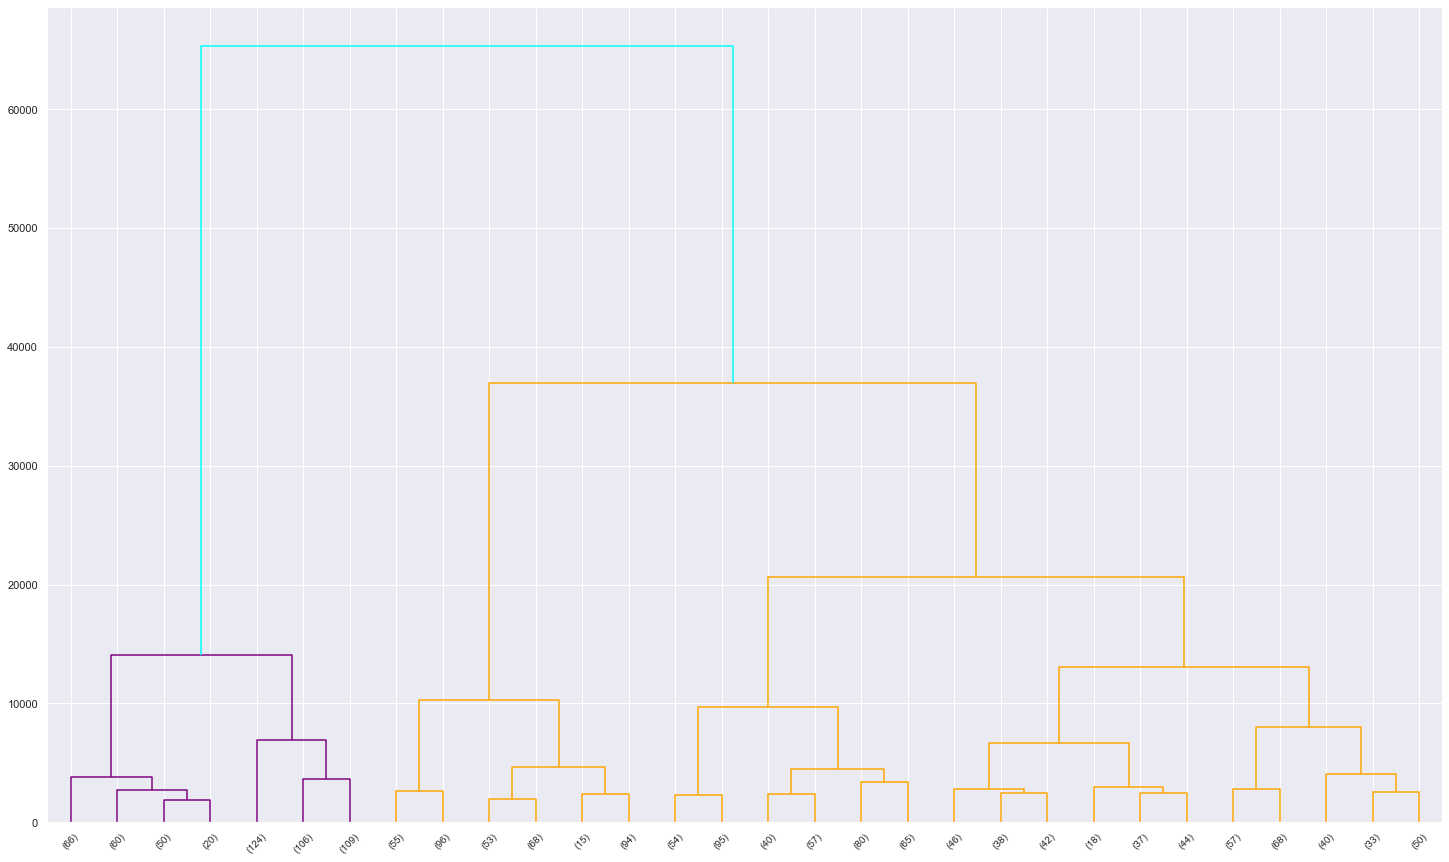

In [32]:
from scipy.cluster import hierarchy

Z = hierarchy.linkage(ag.children_, method='ward')

fig, ax = plt.subplots(figsize=(25,15))


hierarchy.set_link_color_palette(['purple', 'orange'])

den = hierarchy.dendrogram(Z, orientation='top',
                           p=30, truncate_mode='lastp',
                           show_leaf_counts=True, ax=ax,
                           above_threshold_color='cyan')

# As a result
When comparing the findings, I can forecast profit better than loss, which is what we expected given that we have more data for profit-generating enterprises (1: 1679 vs 0: 102). The Complete-link Agglomerative Clustering model appears to be the greatest choice for forecasting loss, while KMeans Clustering appears to be the best candidate for predicting profit, however Ward-link Agglomerative Clustering reached almost the same result.

PCA or hyperparameter adjustment might help you get a better outcome.